In [595]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
import pandas_ta as ta
import seaborn as sns
import warnings


warnings.filterwarnings("ignore")

tag=input("digita tag ").upper()
year=input("digita anno di partenza dati ")
today=datetime.date.today()
db=yf.download(tag,start=f"{year}-01-01", end=today)
print(db.tail())

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-09-14  174.000000  176.100006  173.580002  175.740005  175.740005   
2023-09-15  176.479996  176.500000  173.820007  175.009995  175.009995   
2023-09-18  176.479996  179.380005  176.169998  177.970001  177.970001   
2023-09-19  177.520004  179.630005  177.130005  179.070007  179.070007   
2023-09-20  179.259995  179.699997  175.399994  175.490005  175.490005   

               Volume  
Date                   
2023-09-14   60895800  
2023-09-15  109205100  
2023-09-18   67257600  
2023-09-19   51826900  
2023-09-20   58333200  


In [596]:
db1=db[["Close","Volume"]]
def featureengineering(db1,giornodapredirre):
    ran=int(input("quanto giorni precendenti deve considerare? "))
    for i in range (1,ran+1):
        db1[f"Close {i}"]=db1["Close"].shift(i)
    for i in range (1,ran+1):
        db1[f"Volume {i}"]=db1["Volume"].shift(i)
    
    db1["giornodapredirre"]=db1["Close"].shift(-giornodapredirre)
    
    return db1
giornodapredirre=int(input("digita quanti giorni in avanti predirre "))
db1=featureengineering(db1,giornodapredirre)






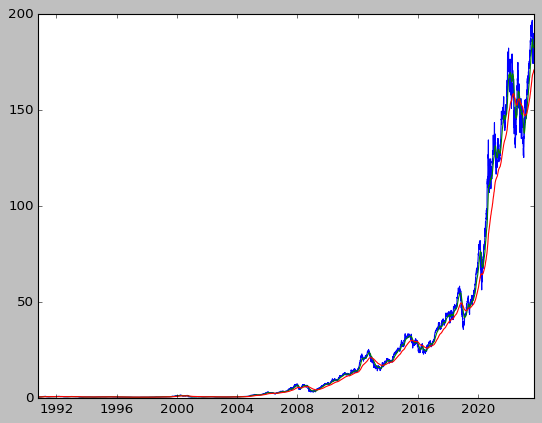

In [597]:
def graficoprezzo(db1):
    db1["ema1"]=ta.ema(db1["Close"],length=50)
    db1["ema2"]=ta.ema(db1["Close"],length=200)
    db1["ema3"]=ta.ema(db1["Close"],length=7)
    db1["ema4"]=ta.ema(db1["Close"],length=21)
    return db1
db1=graficoprezzo(db1)
db3=db1.copy()
db1.dropna(inplace=True)
plt.style.use("classic")
plt.plot(db1.index,db1["Close"])
plt.plot(db1.index,db1["ema1"])
plt.plot(db1.index,db1["ema2"])

In [598]:
def creatingdb2(db):
    db2=db[["Open","Close","Volume"]].copy()
    db2["roc"]=(db2["Close"]-db2["Open"])/db2["Open"]*100
    db2["month"]=db2.index
    db2["month"]=db2["month"].dt.month
    db2["day"]=db2.index
    db2["day"]=db2["day"].dt.day
    return db2
db2=creatingdb2(db)
print(db2.tail())


                  Open       Close     Volume       roc  month  day
Date                                                               
2023-09-14  174.000000  175.740005   60895800  1.000003      9   14
2023-09-15  176.479996  175.009995  109205100 -0.832956      9   15
2023-09-18  176.479996  177.970001   67257600  0.844291      9   18
2023-09-19  177.520004  179.070007   51826900  0.873143      9   19
2023-09-20  179.259995  175.490005   58333200 -2.103084      9   20


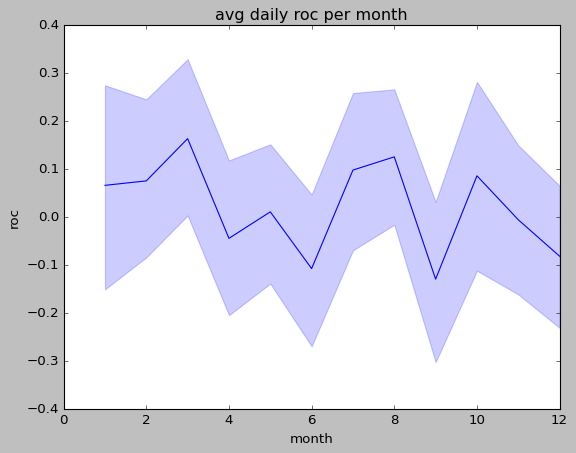

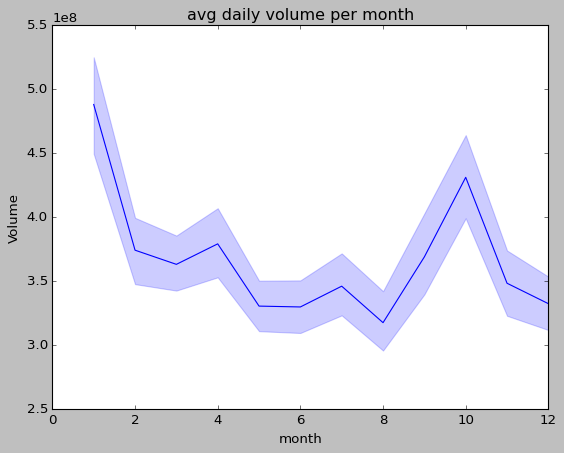

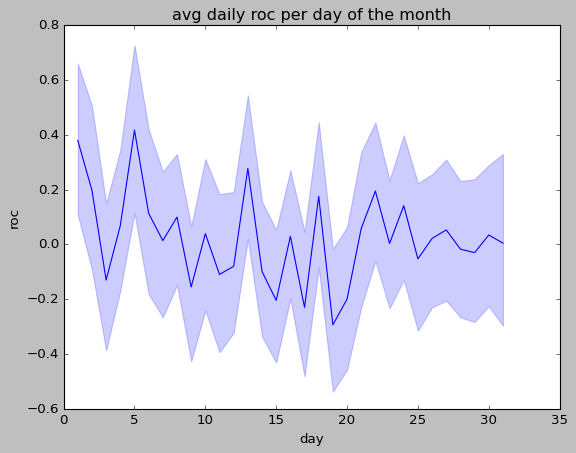

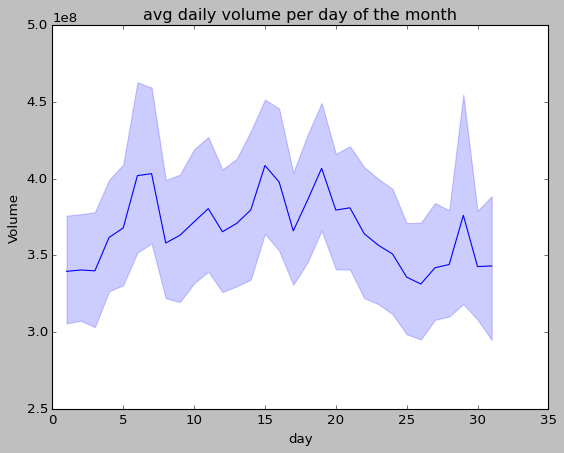

In [599]:
def rappresentazionegrafici(db2):
    sns.lineplot(data=db2,x="month",y="roc")
    plt.title("avg daily roc per month")
    plt.show()
    sns.lineplot(data=db2,x="month",y="Volume")
    plt.title("avg daily volume per month")
    plt.show()
    sns.lineplot(data=db2,x="day",y="roc")
    plt.title("avg daily roc per day of the month")
    plt.show()
    sns.lineplot(data=db2,x="day",y="Volume")
    plt.title("avg daily volume per day of the month")
    plt.show()
rappresentazionegrafici(db2)

<Axes: >

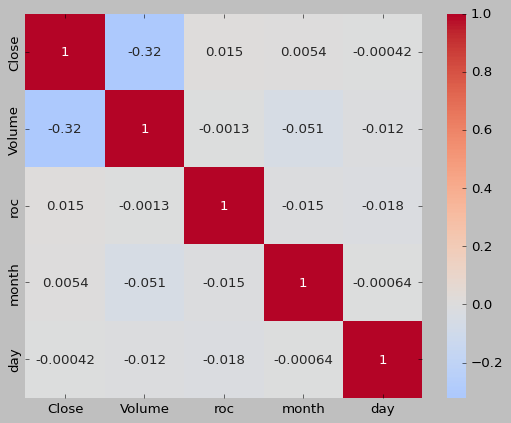

In [600]:
#mappa di correlazione

cor=db2.drop(columns=["Open"]).corr()
sns.heatmap(cor, annot=True,center=0,cmap="coolwarm")

In [601]:
print(db1.shape)
db1=db1.dropna()
print(db1.tail())

(8291, 27)
                 Close     Volume     Close 1     Close 2     Close 3  \
Date                                                                    
2023-09-07  177.559998  112488800  182.910004  189.699997  189.460007   
2023-09-08  178.179993   65551300  177.559998  182.910004  189.699997   
2023-09-11  179.360001   58953100  178.179993  177.559998  182.910004   
2023-09-12  176.300003   90370200  179.360001  178.179993  177.559998   
2023-09-13  174.210007   84267900  176.300003  179.360001  178.179993   

               Close 4     Close 5     Close 6     Close 7     Close 8  ...  \
Date                                                                    ...   
2023-09-07  187.869995  187.649994  184.119995  180.190002  178.610001  ...   
2023-09-08  189.460007  187.869995  187.649994  184.119995  180.190002  ...   
2023-09-11  189.699997  189.460007  187.869995  187.649994  184.119995  ...   
2023-09-12  182.910004  189.699997  189.460007  187.869995  187.649994  ...   
202

In [602]:
#scaling data

from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
db1=db1.astype(float)
colonnenontarget=db1.drop(columns=["giornodapredirre"]).values.reshape(-1,db1.shape[1]-1)
colonnatarget=db1["giornodapredirre"].values.reshape(-1,1)
scalernontarget=MinMaxScaler()
scalertarget=MinMaxScaler()
print(db1)
colonnenontarget=scalernontarget.fit_transform(colonnenontarget)
colonnatarget=scalertarget.fit_transform(colonnatarget)

                 Close       Volume     Close 1     Close 2     Close 3  \
Date                                                                      
1990-10-15    0.247768  201017600.0    0.252232    0.247768    0.236607   
1990-10-16    0.223214  305233600.0    0.247768    0.252232    0.247768   
1990-10-17    0.236607  309064000.0    0.223214    0.247768    0.252232   
1990-10-18    0.254464  315000000.0    0.236607    0.223214    0.247768   
1990-10-19    0.280134  933732800.0    0.254464    0.236607    0.223214   
...                ...          ...         ...         ...         ...   
2023-09-07  177.559998  112488800.0  182.910004  189.699997  189.460007   
2023-09-08  178.179993   65551300.0  177.559998  182.910004  189.699997   
2023-09-11  179.360001   58953100.0  178.179993  177.559998  182.910004   
2023-09-12  176.300003   90370200.0  179.360001  178.179993  177.559998   
2023-09-13  174.210007   84267900.0  176.300003  179.360001  178.179993   

               Close 4  

In [603]:
# divisione in train,test

x=colonnenontarget
y=colonnatarget
split=int(0.8*len(x))
xtrain,xtest=x[:split],x[split:]
ytrain,ytest=y[:split],y[split:]
linearmodel=LinearRegression()
modelgbr=GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,random_state=0)
modelsvr=SVR(kernel="linear")


0.9928012522576856
0.015181105024851945


Text(0.5, 1.0, 'prediction with linear model')

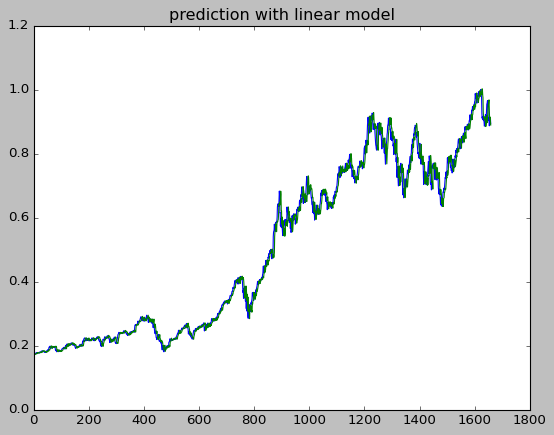

In [604]:
# Linear regression model
linearmodel.fit(xtrain,ytrain)
linearpredictions=linearmodel.predict(xtest)
print(r2_score(ytest,linearpredictions))
print(mean_absolute_error(ytest,linearpredictions))
plt.plot(ytest)
plt.plot(linearpredictions)
plt.title("prediction with linear model")

0.34077452971941485


Text(0.5, 1.0, 'prediction with gbr model')

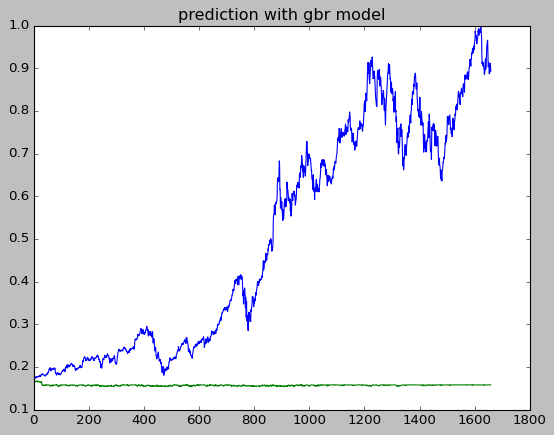

In [605]:
#GBR model

# grid = {
#     'n_estimators': [50, 100, 200],  # Numero di alberi nell'ensemble
#     'learning_rate': [0.01, 0.1, 0.2],  # Tasso di apprendimento
#     'max_depth': [3, 4, 5]  # Massima profondità degli alberi
    
# }

# search=GridSearchCV(estimator=modelgbr,param_grid=grid,cv=5)
# search.fit(xtrain,ytrain)
# bestmodel=search.best_estimator_
# bestmodel.fit(xtrain,ytrain)
modelgbr.fit(xtrain,ytrain)
predictionsgbr=modelgbr.predict(xtest)
print(mean_absolute_error(ytest,predictionsgbr))
plt.plot(ytest)
plt.plot(predictionsgbr)
plt.title("prediction with gbr model")

In [606]:
# model SVR

# gridsvr = {
#     'kernel': ['linear', 'rbf', 'poly'],  # Funzione kernel
#     'C': [0.1, 1, 10],  # Parametro di regolarizzazione
#     'epsilon': [0.01, 0.1, 0.2],  # Tolleranza
#     'gamma': ['scale', 'auto']  # Coefficiente gamma (solo per kernel 'rbf' e 'poly')
# }
# searchsvr=GridSearchCV(estimator=modelsvr, param_grid=gridsvr, cv=5)
# searchsvr.fit(xtrain,ytrain)
# bestmodelsvr=searchsvr.best_estimator_
# predictionssvr=bestmodelsvr.predict(xtest)
# print(r2_score(ytest,predictionssvr))
# print(mean_absolute_error(ytest,predictionssvr))
# plt.plot(ytest)
# plt.plot(predictionssvr)
# plt.title("prediction with SVR model")

In [607]:
# rete neurale con lstm

import torch
import torch.nn as nn

xtraint=torch.from_numpy(xtrain.astype(np.float32)).view(xtrain.shape[0],xtrain.shape[1])
ytraint=torch.from_numpy(ytrain.astype(np.float32)).view(ytrain.shape[0], 1)
xtestt=torch.from_numpy(xtest.astype(np.float32)).view(xtest.shape[0], xtrain.shape[1])


class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet,self).__init__()
        self.l1=nn.LSTM(input_size, hidden_size, batch_first=False)
        self.l3=nn.Linear( hidden_size, hidden_size)
        self.l2=nn.Linear(hidden_size, 1)
        
    def forward(self,x):
        out,_= self.l1(x)                                                 
        # out= self.l3(out)
        # out=out[:,-1]
        
        out=self.l2(out)
        return out
    
model3=NeuralNet(xtrain.shape[1],1)
criterion=nn.L1Loss()
optimizer=torch.optim.Adam(model3.parameters(),lr=0.01)


for epoch in range(1000):
    pred=model3(xtraint)
    loss=criterion(pred,ytraint)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if (epoch+1)%1000==0:
        print(f"epoch :{epoch+1}, loss={loss.item()}")



predictionslstm=model3(xtestt)
predictionslstm=predictionslstm.detach().numpy()


epoch :1000, loss=0.0016870683757588267


Text(0.5, 1.0, 'lstm model')

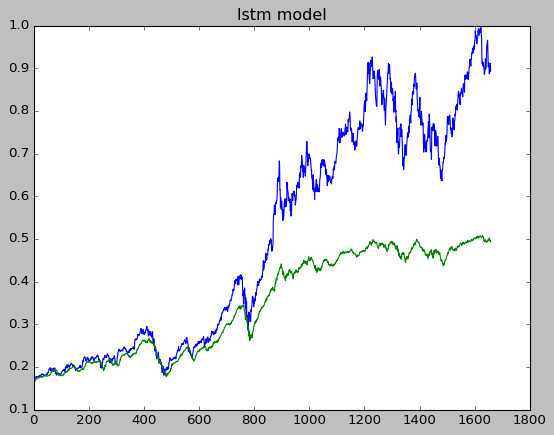

In [608]:

plt.plot(ytest)
plt.plot(predictionslstm)
plt.title("lstm model")

In [609]:
# applico il modello al db con ancora i dati dell'ultimo giorno 
# di mercato perchè nel db1 era stata droppata per il shift per creare la colonna del prezzo del giorno successivo.

db3x=db3.drop(columns=["giornodapredirre"])
db3x.dropna(inplace=True)
xnuova=db3x.values.reshape(-1,db3.shape[1]-1)
xnuova=xnuova[split:]
# print(xnuova)
xnuova=scalernontarget.transform(xnuova)
predictionsnuove=linearmodel.predict(xnuova)

In [610]:
# previsione con modello lineare

oggi=xnuova[-1].reshape(-1,db3.shape[1]-1)
previsionerichiesta=linearmodel.predict(oggi)
ultimachiusura=(db3["Close"].tail(1).reset_index())["Close"]
previsionerichiesta=previsionerichiesta.reshape(1,1)
previsionerichiesta=scalertarget.inverse_transform(previsionerichiesta).reshape(-1)
print(f"il prezzo al giorno richiesto è {round(float(previsionerichiesta),3)}")
print(f"l'ultima chiusura è {round(float(ultimachiusura),3)}")
print(f"secondo il modello lineare rispetto all'ultima chiusura il prezzo alla data {today + datetime.timedelta(days=giornodapredirre)} varierà di {round((float(previsionerichiesta)-float(ultimachiusura))/float(ultimachiusura)*100,3)} %")

il prezzo al giorno richiesto è 175.783
l'ultima chiusura è 175.49
secondo il modello lineare rispetto all'ultima chiusura il prezzo alla data 2023-09-26 varierà di 0.167 %


In [611]:
# Previsioni con modello GBR

oggi=xnuova[-1].reshape(-1,db3.shape[1]-1)
previsionerichiestagbr=modelgbr.predict(oggi)
# ultimachiusura=(db3["Close"].tail(1).reset_index())["Close"]
previsionerichiestagbr=previsionerichiestagbr.reshape(1,1)
previsionerichiestagbr=scalertarget.inverse_transform(previsionerichiestagbr).reshape(-1)
print(f"il prezzo al giorno richiesto è {round(float(previsionerichiestagbr),3)}")
print(f"l'ultima chiusura è {round(float(ultimachiusura),3)}")
print(f"secondo il modello GBR rispetto all'ultima chiusura il prezzo alla data {today + datetime.timedelta(days=giornodapredirre)} varierà di {round((float(previsionerichiestagbr)-float(ultimachiusura))/float(ultimachiusura)*100,3)} %")

il prezzo al giorno richiesto è 31.097
l'ultima chiusura è 175.49
secondo il modello GBR rispetto all'ultima chiusura il prezzo alla data 2023-09-26 varierà di -82.28 %


In [612]:
# previsione con modello SVR


# previsionesvrnuova=bestmodelsvr.predict(oggi)
# ultimachiusura=(db3["Close"].tail(1).reset_index())["Close"]
# previsionesvrnuova=previsionesvrnuova.reshape(1,1)
# previsionesvrnuova=scalertarget.inverse_transform(previsionesvrnuova).reshape(-1)
# print(f"il prezzo al giorno richiesto è {round(float(previsionesvrnuova),3)}")
# print(f"l'ultima chiusura è {round(float(ultimachiusura),3)}")
# print(f"secondo il modello SVR rispetto all'ultima chiusura il prezzo alla data {today + datetime.timedelta(days=giornodapredirre)} varierà di {round((float(previsionesvrnuova)-float(ultimachiusura))/float(ultimachiusura)*100,3)} %")

In [613]:
# previsione con modello lstm

oggit=torch.from_numpy(oggi.astype(np.float32)).view(oggi.shape[0],oggi.shape[1])
predlstmnuove=model3(oggit).detach().numpy()
predlstmnuove=scalertarget.inverse_transform(predlstmnuove)
print(f"il prezzo al giorno richiesto è {round(float(predlstmnuove),3)}")
print(f"l'ultima chiusura è {round(float(ultimachiusura),3)}")
print(f"secondo il modello lstm rispetto all'ultima chiusura il prezzo alla data {today + datetime.timedelta(days=giornodapredirre)} varierà di {round((float(predlstmnuove)-float(ultimachiusura))/float(ultimachiusura)*100,3)} %")


il prezzo al giorno richiesto è 67.599
l'ultima chiusura è 175.49
secondo il modello lstm rispetto all'ultima chiusura il prezzo alla data 2023-09-26 varierà di -61.48 %


In [614]:
# valutazione modello se sale o scende
# L'ultimo giorno del xtest è il giorno attuale meno i giorni che si predicono.
# non serve però avere il giorno attuale perchè si va solo a verificare la precisione del modello nel tempo

xtest1=(scalernontarget.inverse_transform(xtest))[:,0]
ytest1=(scalertarget.inverse_transform(ytest)).flatten()

dbveritiero=pd.DataFrame({"xtest":xtest1,"ytest":ytest1})
dbveritiero.insert(1,"sale",[1 if x>y else 0 for x,y in zip(dbveritiero["ytest"],dbveritiero["xtest"])])
# print(dbveritiero)

In [615]:
# quante volte il modello indovina se il prezzo sale o scende con modello lineare

from sklearn.metrics import confusion_matrix, precision_score
predictionsinverse=(scalertarget.inverse_transform(linearpredictions)).flatten()
dbprevisioni=pd.DataFrame({"xtest":xtest1,"previsioni":predictionsinverse})
dbprevisioni.insert(1,"sale",[1 if x>y else 0 for x,y in zip(dbprevisioni["previsioni"],dbveritiero["xtest"])])
# print(dbprevisioni)
cf=confusion_matrix(dbveritiero["sale"],dbprevisioni["sale"])
print(cf)
precisionemodellolineare=round((cf[0,0]+cf[1,1])/np.sum(cf)*100,2)
print(f"il modello LINEARE ha una precisione del {round(precisionemodellolineare,2)} % nell'indicare se il prezzo sale o scende")
dbmediarocnelperiodo=db3[["Close","giornodapredirre"]]
dbmediarocnelperiodo.dropna(inplace=True)
dbmediarocnelperiodo["rocnelperiodo"]=(dbmediarocnelperiodo["giornodapredirre"]-dbmediarocnelperiodo["Close"])/dbmediarocnelperiodo["Close"]*100
dbrocsale=dbmediarocnelperiodo[dbmediarocnelperiodo["rocnelperiodo"]>0]
dbrocscende=dbmediarocnelperiodo[dbmediarocnelperiodo["rocnelperiodo"]<0]
precisionequandosalelineare=round(cf[1,1]/(cf[1,1]+cf[0,1])*100,2)
precisionequandoscendelineare=round(cf[0,0]/(cf[0,0]+cf[1,0])*100,2)
print(f"Il prezzo di {tag} nella realtà nel periodo di tempo indicato è salito {dbrocsale.shape[0]} volte cioè il {round(dbrocsale.shape[0]/(dbrocscende.shape[0]+dbrocsale.shape[0])*100,2)}% delle volte")
print(f"Il prezzo di {tag} nella realtà nel periodo di tempo indicato è sceso {dbrocscende.shape[0]} volte cioè il {round(dbrocscende.shape[0]/(dbrocscende.shape[0]+dbrocsale.shape[0])*100,2)}% delle volte")
print(f"Quando il prezzo sale in media nel periodo considerato sale in media del {round(dbrocsale['rocnelperiodo'].mean(),2)}%")
print(f"Quando il prezzo scende in media nel periodo considerato scende in media del {round(dbrocscende['rocnelperiodo'].mean(),2)}%")
print(f"Quando il modello prevede che il prezzo sale ha una probbilità del {precisionequandosalelineare}% di avere ragione")
print(f"Quando il modello prevede che il prezzo scende ha una probbilità del {precisionequandoscendelineare}% di avere ragione")
print(f"il prezzo al giorno richiesto è {round(float(previsionerichiesta),3)}")
print(f"l'ultima chiusura è {round(float(ultimachiusura),3)}")
print(f"secondo il modello lineare rispetto all'ultima chiusura il prezzo alla data {today + datetime.timedelta(days=giornodapredirre)} varierà di {round((float(previsionerichiesta)-float(ultimachiusura))/float(ultimachiusura)*100,3)} %")






[[126 545]
 [133 855]]
il modello LINEARE ha una precisione del 59.13 % nell'indicare se il prezzo sale o scende
Il prezzo di AAPL nella realtà nel periodo di tempo indicato è salito 4648 volte cioè il 55.07% delle volte
Il prezzo di AAPL nella realtà nel periodo di tempo indicato è sceso 3792 volte cioè il 44.93% delle volte
Quando il prezzo sale in media nel periodo considerato sale in media del 4.38%
Quando il prezzo scende in media nel periodo considerato scende in media del -4.14%
Quando il modello prevede che il prezzo sale ha una probbilità del 61.07% di avere ragione
Quando il modello prevede che il prezzo scende ha una probbilità del 48.65% di avere ragione
il prezzo al giorno richiesto è 175.783
l'ultima chiusura è 175.49
secondo il modello lineare rispetto all'ultima chiusura il prezzo alla data 2023-09-26 varierà di 0.167 %


In [552]:
# Di quanto sale o scende in media il modello nel periodo di tempo?

# dbmediarocnelperiodo=db3[["Close","giornodapredirre"]]
# dbmediarocnelperiodo.dropna(inplace=True)
# dbmediarocnelperiodo["rocnelperiodo"]=(dbmediarocnelperiodo["giornodapredirre"]-dbmediarocnelperiodo["Close"])/dbmediarocnelperiodo["Close"]*100
# dbrocsale=dbmediarocnelperiodo[dbmediarocnelperiodo["rocnelperiodo"]>0]
# dbrocscende=dbmediarocnelperiodo[dbmediarocnelperiodo["rocnelperiodo"]<0]
# print(f"Il prezzo di {tag} nella realtà nel periodo di tempo indicato è salito {dbrocsale.shape[0]} volte cioè il {round(dbrocsale.shape[0]/(dbrocscende.shape[0]+dbrocsale.shape[0])*100,2)}% delle volte")
# print(f"Il prezzo di {tag} nella realtà nel periodo di tempo indicato è sceso {dbrocscende.shape[0]} volte cioè il {round(dbrocscende.shape[0]/(dbrocscende.shape[0]+dbrocsale.shape[0])*100,2)}% delle volte")
# print(f"Quando il prezzo sale in media nel periodo considerato sale in media del {round(dbrocsale['rocnelperiodo'].mean(),2)}%")
# print(f"Quando il prezzo scende in media nel periodo considerato scende in media del {round(dbrocscende['rocnelperiodo'].mean(),2)}%")


In [553]:
# print(cf)
# print(f"Quando il modello prevede che il prezzo sale ha una probbilità del {round(cf[1,1]/(cf[1,1]+cf[0,1])*100,2)}% di avere ragione")
# print(f"Quando il modello prevede che il prezzo scende ha una probbilità del {round(cf[0,0]/(cf[0,0]+cf[1,0])*100,2)}% di avere ragione")

In [618]:
# MODEL GBR

from sklearn.metrics import confusion_matrix, precision_score
predictionsinverse=(scalertarget.inverse_transform(predictionsgbr.reshape(-1,1))).flatten()
dbprevisioni=pd.DataFrame({"xtest":xtest1,"previsioni":predictionsinverse})
dbprevisioni.insert(1,"sale",[1 if x>y else 0 for x,y in zip(dbprevisioni["previsioni"],dbveritiero["xtest"])])
# print(dbprevisioni)
cf=confusion_matrix(dbveritiero["sale"],dbprevisioni["sale"])
print(cf)
precisionemodellogbr=round((cf[0,0]+cf[1,1])/np.sum(cf),2)*100
print(f"il modello GBR ha una precisione del {precisionemodellogbr} % nell'indicare se il prezzo sale o scende")
dbmediarocnelperiodo=db3[["Close","giornodapredirre"]]
dbmediarocnelperiodo.dropna(inplace=True)
dbmediarocnelperiodo["rocnelperiodo"]=(dbmediarocnelperiodo["giornodapredirre"]-dbmediarocnelperiodo["Close"])/dbmediarocnelperiodo["Close"]*100
dbrocsale=dbmediarocnelperiodo[dbmediarocnelperiodo["rocnelperiodo"]>0]
dbrocscende=dbmediarocnelperiodo[dbmediarocnelperiodo["rocnelperiodo"]<0]
precisionequandosaleGBR=round(cf[1,1]/(cf[1,1]+cf[0,1])*100,2)
precisionequandoscendeGBR=round(cf[0,0]/(cf[0,0]+cf[1,0])*100,2)
print(f"Il prezzo di {tag} nella realtà nel periodo di tempo indicato è salito {dbrocsale.shape[0]} volte cioè il {round(dbrocsale.shape[0]/(dbrocscende.shape[0]+dbrocsale.shape[0])*100,2)}% delle volte")
print(f"Il prezzo di {tag} nella realtà nel periodo di tempo indicato è sceso {dbrocscende.shape[0]} volte cioè il {round(dbrocscende.shape[0]/(dbrocscende.shape[0]+dbrocsale.shape[0])*100,2)}% delle volte")
print(f"Quando il prezzo sale in media nel periodo considerato sale in media del {round(dbrocsale['rocnelperiodo'].mean(),2)}%")
print(f"Quando il prezzo scende in media nel periodo considerato scende in media del {round(dbrocscende['rocnelperiodo'].mean(),2)}%")
print(f"Quando il modello prevede che il prezzo sale ha una probabilità del {precisionequandosaleGBR}% di avere ragione")
print(f"Quando il modello prevede che il prezzo scende ha una probabilità del {precisionequandoscendeGBR}% di avere ragione")
print(f"il prezzo al giorno richiesto è {round(float(previsionerichiestagbr),3)}")
print(f"l'ultima chiusura è {round(float(ultimachiusura),3)}")
print(f"secondo il modello GBR rispetto all'ultima chiusura il prezzo alla data {today + datetime.timedelta(days=giornodapredirre)} varierà di {round((float(previsionerichiestagbr)-float(ultimachiusura))/float(ultimachiusura)*100,3)} %")

[[671   0]
 [988   0]]
il modello GBR ha una precisione del 40.0 % nell'indicare se il prezzo sale o scende
nan 40.45
Il prezzo di AAPL nella realtà nel periodo di tempo indicato è salito 4648 volte cioè il 55.07% delle volte
Il prezzo di AAPL nella realtà nel periodo di tempo indicato è sceso 3792 volte cioè il 44.93% delle volte
Quando il prezzo sale in media nel periodo considerato sale in media del 4.38%
Quando il prezzo scende in media nel periodo considerato scende in media del -4.14%
Quando il modello prevede che il prezzo sale ha una probabilità del nan% di avere ragione
Quando il modello prevede che il prezzo scende ha una probabilità del 40.45% di avere ragione
il prezzo al giorno richiesto è 31.097
l'ultima chiusura è 175.49
secondo il modello GBR rispetto all'ultima chiusura il prezzo alla data 2023-09-26 varierà di -82.28 %


In [620]:
# Model LSTM

from sklearn.metrics import confusion_matrix, precision_score
predictionsinverse=(scalertarget.inverse_transform(predictionslstm.reshape(-1,1))).flatten()
dbprevisioni=pd.DataFrame({"xtest":xtest1,"previsioni":predictionsinverse})
dbprevisioni.insert(1,"sale",[1 if x>y else 0 for x,y in zip(dbprevisioni["previsioni"],dbveritiero["xtest"])])
# print(dbprevisioni)
cf=confusion_matrix(dbveritiero["sale"],dbprevisioni["sale"])
print(cf)
precisionemodellolstm=round((cf[0,0]+cf[1,1])/np.sum(cf),2)*100
print(f"il modello LSTM ha una precisione del {precisionemodellolstm} % nell'indicare se il prezzo sale o scende")
dbmediarocnelperiodo=db3[["Close","giornodapredirre"]]
dbmediarocnelperiodo.dropna(inplace=True)
dbmediarocnelperiodo["rocnelperiodo"]=(dbmediarocnelperiodo["giornodapredirre"]-dbmediarocnelperiodo["Close"])/dbmediarocnelperiodo["Close"]*100
dbrocsale=dbmediarocnelperiodo[dbmediarocnelperiodo["rocnelperiodo"]>0]
dbrocscende=dbmediarocnelperiodo[dbmediarocnelperiodo["rocnelperiodo"]<0]
precisionequandosaleLSTM=round(cf[1,1]/(cf[1,1]+cf[0,1])*100,2)
precisionequandoscendeLSTM=round(cf[0,0]/(cf[0,0]+cf[1,0])*100,2)
print(f"Il prezzo di {tag} nella realtà nel periodo di tempo indicato è salito {dbrocsale.shape[0]} volte cioè il {round(dbrocsale.shape[0]/(dbrocscende.shape[0]+dbrocsale.shape[0])*100,2)}% delle volte")
print(f"Il prezzo di {tag} nella realtà nel periodo di tempo indicato è sceso {dbrocscende.shape[0]} volte cioè il {round(dbrocscende.shape[0]/(dbrocscende.shape[0]+dbrocsale.shape[0])*100,2)}% delle volte")
print(f"Quando il prezzo sale in media nel periodo considerato sale in media del {round(dbrocsale['rocnelperiodo'].mean(),2)}%")
print(f"Quando il prezzo scende in media nel periodo considerato scende in media del {round(dbrocscende['rocnelperiodo'].mean(),2)}%")
print(f"Quando il modello prevede che il prezzo sale ha una probabilità del {precisionequandosaleLSTM}% di avere ragione")
print(f"Quando il modello prevede che il prezzo scende ha una probabilità del {precisionequandoscendeLSTM}% di avere ragione")
print(f"il prezzo al giorno richiesto è {round(float(predlstmnuove),3)}")
print(f"l'ultima chiusura è {round(float(ultimachiusura),3)}")
print(f"secondo il modello lstm rispetto all'ultima chiusura il prezzo alla data {today + datetime.timedelta(days=giornodapredirre)} varierà di {round((float(predlstmnuove)-float(ultimachiusura))/float(ultimachiusura)*100,3)} %")

[[664   7]
 [970  18]]
il modello LSTM ha una precisione del 41.0 % nell'indicare se il prezzo sale o scende
72.0 40.64
Il prezzo di AAPL nella realtà nel periodo di tempo indicato è salito 4648 volte cioè il 55.07% delle volte
Il prezzo di AAPL nella realtà nel periodo di tempo indicato è sceso 3792 volte cioè il 44.93% delle volte
Quando il prezzo sale in media nel periodo considerato sale in media del 4.38%
Quando il prezzo scende in media nel periodo considerato scende in media del -4.14%
Quando il modello prevede che il prezzo sale ha una probabilità del 72.0% di avere ragione
Quando il modello prevede che il prezzo scende ha una probabilità del 40.64% di avere ragione
il prezzo al giorno richiesto è 67.599
l'ultima chiusura è 175.49
secondo il modello lstm rispetto all'ultima chiusura il prezzo alla data 2023-09-26 varierà di -61.48 %


In [626]:
print(f"Il periodo di riferimento è {giornodapredirre} giorni")

# quale è il modello con più precisione in assoluto

modellopiùpreciso=max(precisionemodellolineare,precisionemodellolstm,precisionemodellogbr)
if modellopiùpreciso==precisionemodellolineare:
    print(f"il modello più preciso è il modello lineare: {precisionemodellolineare}")
elif modellopiùpreciso==precisionemodellolstm:
    print(f"il modello più preciso è il modello LSTM: {precisionemodellolstm}")
elif modellopiùpreciso==precisionemodellogbr:
    print(f"il modello più preciso è il modello GBR: {precisionemodellogbr}")
modellomenopreciso=min(precisionemodellolineare,precisionemodellolstm,precisionemodellogbr)
if modellomenopreciso==precisionemodellolineare:
    print(f"il modello meno preciso è il modello lineare: {precisionemodellolineare}")
elif modellomenopreciso==precisionemodellolstm:
    print(f"il modello meno preciso è il modello LSTM: {precisionemodellolstm}")
elif modellomenopreciso==precisionemodellogbr:
    print(f"il modello meno preciso è il modello GBR: {precisionemodellogbr}")


# quale è il modello che prevede meglio quando il prezzo sale

modellopiùprecisoquandosale=max(precisionequandosaleLSTM,precisionequandosaleGBR,precisionequandosalelineare)
if modellopiùprecisoquandosale==precisionequandosalelineare:
    print(f"il modello più preciso quando prevede che sale è il modello lineare: {precisionequandosalelineare}")
elif modellopiùprecisoquandosale==precisionequandosaleLSTM:
    print(f"il modello più preciso quando prevede che sale è il modello LSTM: {precisionequandosaleLSTM}")
elif modellopiùprecisoquandosale==precisionequandosaleGBR:
    print(f"il modello più preciso quando prevede che sale è il modello GBR: {precisionequandosaleGBR}")

# quale è il modello che prevede meglio quando il prezzo scende

modellopiùprecisoquandoscende=max(precisionequandoscendeLSTM,precisionequandoscendeGBR,precisionequandoscendelineare)
if modellopiùprecisoquandoscende==precisionequandoscendelineare:
    print(f"il modello più preciso quando prevede che scende è il modello lineare: {precisionequandoscendelineare}")
elif modellopiùprecisoquandoscende==precisionequandoscendeLSTM:
    print(f"il modello più preciso quando prevede che scende è il modello LSTM: {precisionequandoscendeLSTM}")
elif modellopiùprecisoquandoscende==precisionequandoscendeGBR:
    print(f"il modello più preciso quando prevede che scende è il modello GBR: {precisionequandoscendeGBR}")




Il periodo di riferimento è 5 giorni
il modello più preciso è il modello lineare: 59.13
il modello meno preciso è il modello GBR: 40.0
il modello più preciso quando prevede che sale è il modello LSTM: 72.0
il modello più preciso quando prevede che scende è il modello lineare: 48.65


In [629]:
# quale è il modello che prevede peggio quando il prezzo sale

modellomenoprecisoquandosale=min(precisionequandosaleLSTM,precisionequandosaleGBR,precisionequandosalelineare)
if modellomenoprecisoquandosale==precisionequandosalelineare:
    print(f"il modello meno preciso quando prevede che sale è il modello lineare: {precisionequandosalelineare}")
elif modellomenoprecisoquandosale==precisionequandosaleLSTM:
    print(f"il modello meno preciso quando prevede che sale è il modello LSTM: {precisionequandosaleLSTM}")
elif modellomenoprecisoquandosale==precisionequandosaleGBR:
    print(f"il modello meno preciso quando prevede che sale è il modello GBR: {precisionequandosaleGBR}")

# quale è il modello che prevede peggio quando il prezzo scende

modellomenoprecisoquandoscende=min(precisionequandoscendeLSTM,precisionequandoscendeGBR,precisionequandoscendelineare)
if modellomenoprecisoquandoscende==precisionequandoscendelineare:
    print(f"il modello meno preciso quando prevede che scende è il modello lineare: {precisionequandoscendelineare}")
elif modellomenoprecisoquandoscende==precisionequandoscendeLSTM:
    print(f"il modello meno preciso quando prevede che scende è il modello LSTM: {precisionequandoscendeLSTM}")
elif modellomenoprecisoquandoscende==precisionequandoscendeGBR:
    print(f"il modello meno preciso quando prevede che scende è il modello GBR: {precisionequandoscendeGBR}")

il modello meno preciso quando prevede che sale è il modello lineare: 61.07
il modello meno preciso quando prevede che scende è il modello GBR: 40.45
